# Proyek Analisis Data: Bike-sharing-dataset.zip
- **Nama:** Regi Aprilian
- **Email:** regiaprilian04@gmail.com
- **ID Dicoding:** regi_aprilian_8mzH

## Menentukan Pertanyaan Bisnis

- Apa dampak kondisi cuaca (suhu dan kelembapan) terhadap jumlah total penyewaan sepeda harian, khususnya bagi pengguna biasa dibandingkan dengan pengguna terdaftar?
- Bagaimana hari libur mempengaruhi pola penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [91]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [93]:
day_df = pd.read_csv("/content/drive/My Drive/Bike/day.csv", delimiter=",")
hour_df = pd.read_csv("/content/drive/My Drive/Bike/hour.csv", delimiter=",")

In [94]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [95]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Ada potensi untuk melihat pola penggunaan sepeda berdasarkan waktu (harian dan jam), cuaca, musim, dan jenis pengguna.
- Kita dapat melakukan analisis mendalam tentang kapan dan dalam kondisi apa pengguna cenderung menyewa sepeda lebih banyak.

### Assessing Data

In [96]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [97]:
print('Jumlah duplikasi: ', day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight day_df:**
- Kolom dteday memiliki tipe data object, yang menunjukkan bahwa ini adalah data string, padahal harusnya berisi tanggal.
- Kolom-kolom lainnya memiliki tipe data yang sesuai dengan konteksnya.
- Tidak terdapat duplikasi data
- Terdapat nilai 0,000 untuk kolom hum yang mana ini tidak masuk akal, sehingga perlu diperiksa lebih lanjut.


In [98]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [99]:
print('Jumlah duplikasi: ', hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight hour_df:**
- Kolom dteday memiliki tipe data object, yang menunjukkan bahwa ini adalah data string, padahal harusnya berisi tanggal.
- Kolom-kolom lainnya memiliki tipe data yang sesuai dengan konteksnya.
- Tidak terdapat duplikasi data
- Terdapat nilai 0,000 untuk kolom hum, windspeed, dan dan atemp yang mana ini tidak masuk akal, sehingga perlu diperiksa lebih lanjut.

### Cleaning Data

In [100]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [101]:
mean_hum_day = day_df['hum'].mean()
day_df['hum'] = day_df['hum'].replace(0, mean_hum_day)
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628753,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.627500,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140518,0.077498,686.622488,1560.256377,1937.211452


**Insight day_df:**
- Kolom dteday yang awalnya bertipe objek, sudah diganti dengan format yang sesuai yakni format datetime dengan presisi hingga nanosecond (ns)
- Nilai hum yang awalnya bernilai 0,000 sudah diganti dengan nilai mean dari hum, sehingga nilai hum (kelembapan) menjadi lebih masuk akal.

In [102]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [103]:
mean_hum_hour = hour_df['hum'].mean()
mean_windspeed_hour = hour_df['windspeed'].mean()
mean_atemp_hour = hour_df['atemp'].mean
hour_df['hum'] = hour_df['hum'].replace(0, mean_hum_hour)
hour_df['windspeed'] = hour_df['windspeed'].replace(0, mean_windspeed_hour)
hour_df['atemp'] = hour_df['atemp'].replace(0, mean_atemp_hour)
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.628023,0.213943,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.080000,0.089600,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.480000,0.134300,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.191633,0.099324,49.305030,151.357286,181.387599


**Insight hour_df:**
- Kolom dteday yang awalnya bertipe objek, sudah diganti dengan format yang sesuai yakni format datetime dengan presisi hingga nanosecond (ns)
- Nilai hum, windspeed, dan atemp yang awalnya bernilai 0,000 sudah diganti dengan nilai mean dari masing-masing hum, windspeed, dan atemp sehingga nilai ketiganya menjadi lebih masuk akal.

## Exploratory Data Analysis (EDA)

### Explore ...

In [104]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628753,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.627500,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140518,0.077498,686.622488,1560.256377,1937.211452


In [105]:
day_df.groupby('season').agg({'casual': 'sum', 'registered': 'sum', 'temp':['max', 'min', 'mean', 'std'], 'hum':['max', 'min', 'mean', 'std']})

casual registered      temp                                     hum  \
           sum        sum       max       min      mean       std       max   
season                                                                        
1        60622     410726  0.572500  0.059130  0.297748  0.102735  0.948261   
2       203522     715067  0.808333  0.253043  0.544405  0.122650  0.922500   
3       226091     835038  0.861667  0.469167  0.706309  0.070848  0.939565   
4       129782     711831  0.657500  0.220833  0.422906  0.107834  0.972500   

                                      
             min      mean       std  
season                                
1       0.187917  0.586372  0.145530  
2       0.254167  0.626948  0.152841  
3       0.360000  0.633482  0.119349  
4       0.333478  0.668719  0.131248

In [106]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0000,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6212,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,988.0000,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,NaN,0.628023,0.213943,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,NaN,0.080000,0.089600,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,NaN,0.480000,0.134300,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,NaN,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,NaN,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,NaN,1.000000,0.850700,367.000000,886.000000,977.000000


In [107]:
hour_df.groupby('season').agg({'casual': 'sum', 'registered': 'sum', 'temp':['max', 'min', 'mean', 'std'], 'hum':['max', 'min', 'mean', 'std']})

casual registered  temp                            hum        \
           sum        sum   max   min      mean       std  max   min   
season                                                                 
1        60622     410726  0.72  0.02  0.299147  0.118726  1.0  0.08   
2       203522     715067  0.94  0.16  0.544663  0.139233  1.0  0.16   
3       226091     835038  1.00  0.38  0.706410  0.093903  1.0  0.16   
4       129782     711831  0.76  0.14  0.423138  0.122167  1.0  0.16   

                            
            mean       std  
season                      
1       0.584601  0.194958  
2       0.627022  0.205364  
3       0.633167  0.177866  
4       0.667124  0.178149

**Insight:**
- Telah diperoleh pivot table pada file date.csv dan hour.csv yang memuat informasi casual users dan registered users serta parameter temperature dan humidity untuk nanti akan dicari pengaruhnya.

In [108]:
day_df.groupby('mnth').agg({'cnt': 'sum', 'weekday': ['max', 'min', 'mean', 'std'], 'holiday': ['max', 'min', 'mean', 'std']})

cnt weekday                         holiday                        
         sum     max min      mean       std     max min      mean       std
mnth                                                                        
1     134933       6   0  2.870968  2.060430       1   0  0.048387  0.216335
2     151352       6   0  3.000000  2.000000       1   0  0.035088  0.185637
3     228920       6   0  3.096774  1.981138       0   0  0.000000  0.000000
4     269094       6   0  3.000000  2.058467       1   0  0.033333  0.181020
5     331686       6   0  2.903226  1.981138       1   0  0.032258  0.178127
6     346342       6   0  3.100000  2.005923       0   0  0.000000  0.000000
7     344948       6   0  2.935484  2.063508       1   0  0.032258  0.178127
8     351194       6   0  3.000000  1.958588       0   0  0.000000  0.000000
9     345991       6   0  3.050000  2.045458       1   0  0.033333  0.181020
10    322352       6   0  2.919355  2.026856       1   0  0.032258  0.178127
11    254831       6   0  3.033333  1.974126       1   0  0.066667  0.251549
12    211036       6   0  3.064516  2.063508       1   0  0.032258  0.178127

In [109]:
hour_df.groupby('mnth').agg({'cnt': 'sum', 'weekday': ['max', 'min', 'mean', 'std'], 'holiday': ['max', 'min', 'mean', 'std']})

cnt weekday                         holiday                        
         sum     max min      mean       std     max min      mean       std
mnth                                                                        
1     134933       6   0  2.869839  2.068131       1   0  0.049685  0.217370
2     151352       6   0  3.011186  1.989681       1   0  0.035048  0.183971
3     228920       6   0  3.107943  1.964328       0   0  0.000000  0.000000
4     269094       6   0  3.002784  2.042717       1   0  0.033403  0.179749
5     331686       6   0  2.903226  1.965757       1   0  0.032258  0.176744
6     346342       6   0  3.100000  1.989828       0   0  0.000000  0.000000
7     344948       6   0  2.935484  2.047487       1   0  0.032258  0.176744
8     351194       6   0  3.002034  1.931492       0   0  0.000000  0.000000
9     345991       6   0  3.051496  2.030099       1   0  0.033403  0.179749
10    322352       6   0  2.957960  2.019975       1   0  0.033081  0.178909
11    254831       6   0  3.033403  1.959264       1   0  0.066806  0.249772
12    211036       6   0  3.070128  2.047794       1   0  0.031018  0.173425

**Insight:**
- Telah diperoleh pivot table pada file date.csv dan hour.csv yang memuat informasi total keseluruhan users (casual & registered) serta parameter weekday dan holiday untuk nanti akan dicari pengaruhnya.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa dampak kondisi cuaca (suhu dan kelembapan) terhadap jumlah total penyewaan sepeda harian, khususnya bagi pengguna biasa dibandingkan dengan pengguna terdaftar?

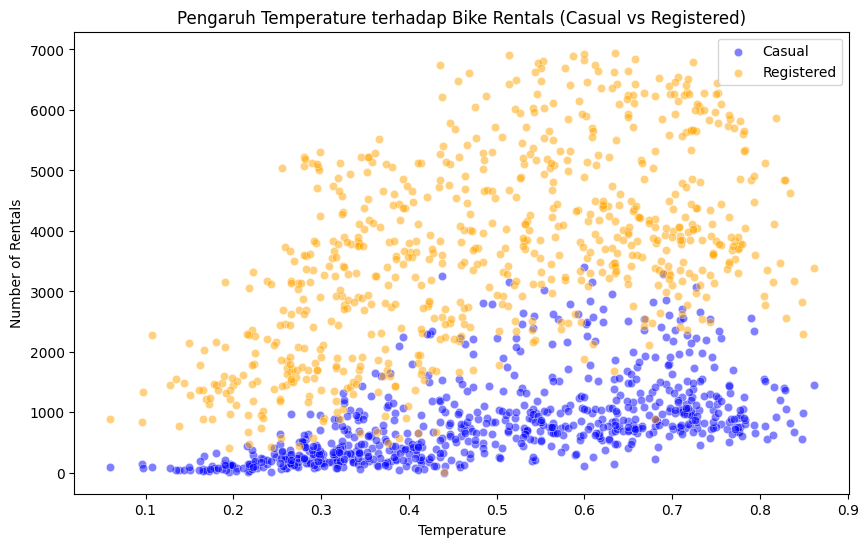

In [110]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='casual', data=day_df, label='Casual', color='blue', alpha=0.5)
sns.scatterplot(x='temp', y='registered', data=day_df, label='Registered', color='orange', alpha=0.5)
plt.title('Pengaruh Temperature terhadap Bike Rentals (Casual vs Registered)')
plt.xlabel('Temperature')
plt.ylabel('Number of Rentals')
plt.legend()
plt.show()

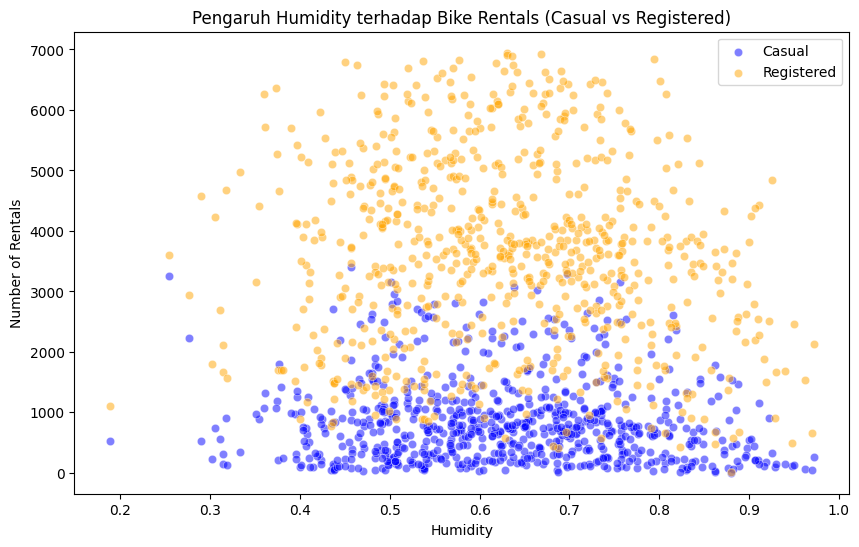

In [111]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='casual', data=day_df, label='Casual', color='blue', alpha=0.5)
sns.scatterplot(x='hum', y='registered', data=day_df, label='Registered', color='orange', alpha=0.5)
plt.title('Pengaruh Humidity terhadap Bike Rentals (Casual vs Registered)')
plt.xlabel('Humidity')
plt.ylabel('Number of Rentals')
plt.legend()
plt.show()

**Insight:**
- Berdasarkan scatterplott yang telah dibuat, terlihat bahwa kenaikan temperature berkorelasi positif dengan jumlah sepeda yang disewa baik oleh casual user maupun registered user.
- Pada scatterplot juga ditunjukkan bahwa humidity tidak memiliki korelasi terhadap jumlah penyewa sepeda.

### Pertanyaan 2: Bagaimana hari libur mempengaruhi pola penyewaan sepeda?

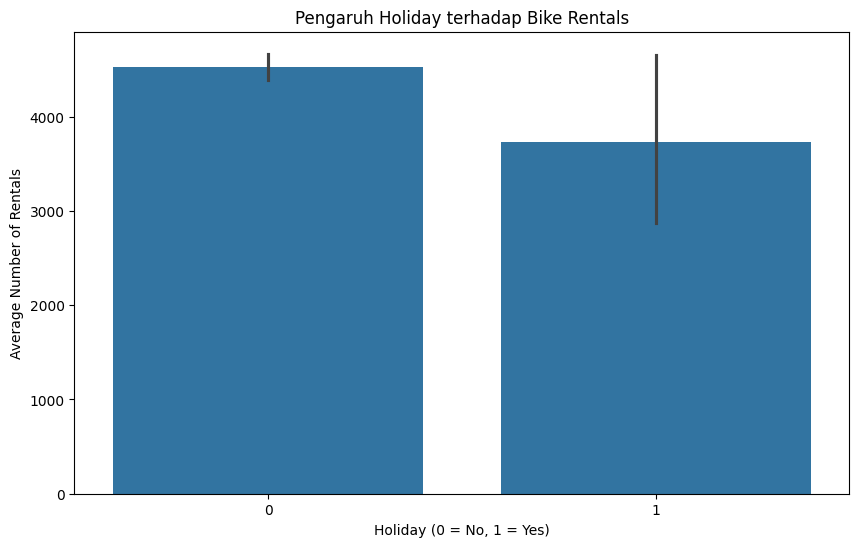

In [112]:
plt.figure(figsize=(10, 6))
sns.barplot(x='holiday', y='cnt', data=day_df)
plt.title('Pengaruh Holiday terhadap Bike Rentals')
plt.xlabel('Holiday (0 = No, 1 = Yes)')
plt.ylabel('Average Number of Rentals')
plt.show()

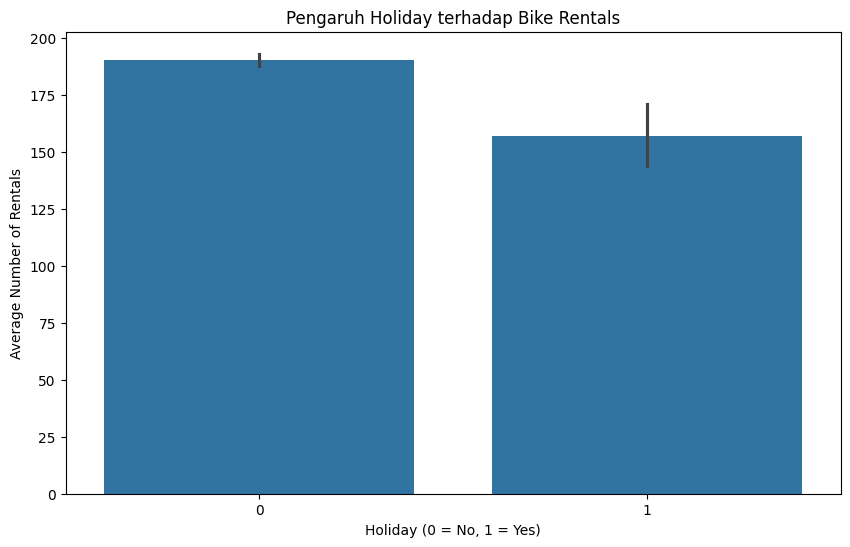

In [113]:
plt.figure(figsize=(10, 6))
sns.barplot(x='holiday', y='cnt', data=hour_df)
plt.title('Pengaruh Holiday terhadap Bike Rentals')
plt.xlabel('Holiday (0 = No, 1 = Yes)')
plt.ylabel('Average Number of Rentals')
plt.show()

**Insight:**
- Berdasarkan Barplot tersebut, terlihat bahwa bar yang menunjukkan jumlah penyewa sepeda pada hari libur lebih sedikit daripada selain hari libur.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1: Berdasarkan scatterplott yang telah dibuat, terlihat bahwa kenaikan temperature berkorelasi positif dengan jumlah sepeda yang disewa baik oleh casual user maupun registered user. Artinya temperature dapat mempengaruhi keinginan seseorang untuk menyewa sepeda, semakin naik temperature, maka jumlah penyewa sepeda akan semakin banyak, begitu juga sebaliknya. Pada scatterplot juga ditunjukkan bahwa humidity tidak memiliki korelasi terhadap jumlah penyewa sepeda. Artinya, tingkat humidity tidak akan mempengaruhi keinginan seseorang untuk menyewa sepeda.
- Conclution pertanyaan 2: Berdasarkan Barplot tersebut, terlihat bahwa bar yang menunjukkan jumlah penyewa sepeda pada hari libur lebih sedikit daripada selain hari libur. Artinya, orang-orang lebih banyak menyewa sepeda di hari selain hari libur dibandingkan hari libur. Hal ini bisa jadi disebabkan karena banyak orang yang menyewa sepeda untuk kebutuhan bekerja, sekolah atau aktivitas lainnya pada hari selain hari libur dan lebih memilih di rumah atau berlibur dengan transportasi lain pada hari libur.

In [118]:
all_df =  pd.concat([day_df, hour_df], ignore_index=True)
print (all_df.head())

   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957   0.22927  0.436957   0.186900      82        1518   

    cnt  hr  
0   985 NaN  
1   801 NaN  
2  1349 NaN  
3  1562 NaN  
4  1600 NaN  


In [119]:
all_df.to_csv('all_data.csv', index=False)